In [22]:
import nrrd
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from visu_utils import read_skeletons, visualize, compute_metrics, create_df

In [24]:
disk_path = Path("/mnt/LaCie/psuau/")

nn_unet_v3_dir = disk_path / "checkpoints/nn_unet_prediction/nn_unet_v3/"
nn_unet_v5_dir = disk_path / "checkpoints/nn_unet_prediction/nn_unet_v5/"
gt_dir = disk_path / "data/nn_unet/chlamy_groundtruth_processed/binaries/"
skeleton_dir = disk_path / "checkpoints/nn_unet_prediction/skeleton"
membrain_seg_dir = disk_path / "checkpoints/membrainseg_prediction"

In [25]:
"""class_v3 = 1
temp_paths = nn_unet_v3_dir.glob("*.nrrd")
for pred_path in temp_paths:
    data, header = nrrd.read(pred_path)

    all_class_dir = pred_path.parent / "all_class"
    all_class_dir.mkdir(parents=True, exist_ok=True)
    all_class_file_path = all_class_dir / (
        pred_path.stem + "_all_class" + pred_path.suffix
    )
    nrrd.write(str(all_class_file_path), data, header)

    data = (data == class_v3).astype(np.uint8)
    nrrd.write(str(pred_path), data, header)"""

'class_v3 = 1\ntemp_paths = nn_unet_v3_dir.glob("*.nrrd")\nfor pred_path in temp_paths:\n    data, header = nrrd.read(pred_path)\n\n    all_class_dir = pred_path.parent / "all_class"\n    all_class_dir.mkdir(parents=True, exist_ok=True)\n    all_class_file_path = all_class_dir / (\n        pred_path.stem + "_all_class" + pred_path.suffix\n    )\n    nrrd.write(str(all_class_file_path), data, header)\n\n    data = (data == class_v3).astype(np.uint8)\n    nrrd.write(str(pred_path), data, header)'

In [26]:
gt_paths = gt_dir.glob("*/*membrane*.nrrd")
gt_paths = sorted(gt_paths)

gt_skeleton_paths = skeleton_dir.glob("gt/*.nrrd")
gt_skeleton_paths = sorted(gt_skeleton_paths)

nn_unet_v5_paths = nn_unet_v5_dir.glob("*.nrrd")
nn_unet_v5_paths = sorted(nn_unet_v5_paths)

nn_unet_v5_skeleton_paths = skeleton_dir.glob("nn_unet_v5/*.nrrd")
nn_unet_v5_skeleton_paths = sorted(nn_unet_v5_skeleton_paths)

nn_unet_v3_paths = nn_unet_v3_dir.glob("*.nrrd")
nn_unet_v3_paths = sorted(nn_unet_v3_paths)

nn_unet_v3_skeleton_paths = skeleton_dir.glob("nn_unet_v3/*.nrrd")
nn_unet_v3_skeleton_paths = sorted(nn_unet_v3_skeleton_paths)

membrain_seg_paths = membrain_seg_dir.glob("*.mrc")
membrain_seg_paths = sorted(membrain_seg_paths)

membrain_skeleton_paths = skeleton_dir.glob("membrainseg_prediction/*.nrrd")
membrain_skeleton_paths = sorted(membrain_skeleton_paths)

In [27]:
for (
    gt_path,
    nn_unet_v3_path,
    nn_unet_v3_skeleton_path,
    nn_unet_v5_path,
    nn_unet_v5_skeleton_path,
    gt_skeleton_path,
    membrain_seg_path,
    membrain_skeleton_path,
) in zip(
    gt_paths,
    nn_unet_v3_paths,
    nn_unet_v3_skeleton_paths,
    nn_unet_v5_paths,
    nn_unet_v5_skeleton_paths,
    gt_skeleton_paths,
    membrain_seg_paths,
    membrain_skeleton_paths,
):
    print(
        gt_path.name,
        nn_unet_v3_path.name,
        nn_unet_v3_skeleton_path.name,
        nn_unet_v5_path.name,
        nn_unet_v5_skeleton_path.name,
        gt_skeleton_path.name,
        membrain_seg_path.name,
        membrain_skeleton_path.name,
    )

0050_membrane_cropped_z_138_354_v_size_10.nrrd tomo_0050.nrrd tomo_0050.nrrd tomo_0050.nrrd tomo_0050.nrrd tomo_0050.nrrd tomo_0050_0000_MemBrain_seg_v10_alpha.ckpt_segmented.mrc tomo_0050.nrrd
0167_membrane_cropped_z_174_413_v_size_10.nrrd tomo_0167.nrrd tomo_0167.nrrd tomo_0167.nrrd tomo_0167.nrrd tomo_0167.nrrd tomo_0167_0000_MemBrain_seg_v10_alpha.ckpt_segmented.mrc tomo_0167.nrrd
0298_membrane_cropped_z_55_449_v_size_10.nrrd tomo_0298.nrrd tomo_0298.nrrd tomo_0298.nrrd tomo_0298.nrrd tomo_0298.nrrd tomo_0298_0000_MemBrain_seg_v10_alpha.ckpt_segmented.mrc tomo_0298.nrrd
0649_membrane_cropped_z_112_391_v_size_10.nrrd tomo_0649.nrrd tomo_0649.nrrd tomo_0649.nrrd tomo_0649.nrrd tomo_0649.nrrd tomo_0649_0000_MemBrain_seg_v10_alpha.ckpt_segmented.mrc tomo_0649.nrrd
0909_membrane_cropped_z_152_424_v_size_10.nrrd tomo_0909.nrrd tomo_0909.nrrd tomo_0909.nrrd tomo_0909.nrrd tomo_0909.nrrd tomo_0909_0000_MemBrain_seg_v10_alpha.ckpt_segmented.mrc tomo_0909.nrrd
0929_membrane_cropped_z_182_388

In [28]:
pred_paths = nn_unet_v3_paths
pred_skeleton_paths = nn_unet_v3_paths

In [29]:
cmds = []
pred_dir = pred_paths[0].parent.parts[-1]

skeleton_pred_dir_path = skeleton_dir / pred_dir
skeleton_pred_dir_path.mkdir(parents=True, exist_ok=True)

skeleton_gt_dir_path = skeleton_dir / "gt"
skeleton_gt_dir_path.mkdir(parents=True, exist_ok=True)


for pred_path, gt_path in zip(pred_paths, gt_paths):
    tomo_num = gt_path.name[:4]
    pred_name = f"tomo_{tomo_num.zfill(4)}.nrrd"

    skeleton_path = skeleton_pred_dir_path / pred_name
    gt_skeleton_path = skeleton_gt_dir_path / pred_name

    cmd = [
        "python seg_skel_dice.py",  # "seg_skel_dice",
        "-i",
        str(pred_path),
        "-g",
        str(gt_path),
        "-m",
        "s",
        "-o",
        str(skeleton_path),
        "-t",
        str(gt_skeleton_path),
    ]

    cmds.append(" ".join(cmd))

    print(cmd)


" && ".join(cmds)

['python seg_skel_dice.py', '-i', '/mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_0050.nrrd', '-g', '/mnt/LaCie/psuau/data/nn_unet/chlamy_groundtruth_processed/binaries/0050_labels/0050_membrane_cropped_z_138_354_v_size_10.nrrd', '-m', 's', '-o', '/mnt/LaCie/psuau/checkpoints/nn_unet_prediction/skeleton/nn_unet_v3/tomo_0050.nrrd', '-t', '/mnt/LaCie/psuau/checkpoints/nn_unet_prediction/skeleton/gt/tomo_0050.nrrd']
['python seg_skel_dice.py', '-i', '/mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_0167.nrrd', '-g', '/mnt/LaCie/psuau/data/nn_unet/chlamy_groundtruth_processed/binaries/0167_labels/0167_membrane_cropped_z_174_413_v_size_10.nrrd', '-m', 's', '-o', '/mnt/LaCie/psuau/checkpoints/nn_unet_prediction/skeleton/nn_unet_v3/tomo_0167.nrrd', '-t', '/mnt/LaCie/psuau/checkpoints/nn_unet_prediction/skeleton/gt/tomo_0167.nrrd']
['python seg_skel_dice.py', '-i', '/mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_0298.nrrd', '-g', '/mnt/LaCie/psu

'python seg_skel_dice.py -i /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_0050.nrrd -g /mnt/LaCie/psuau/data/nn_unet/chlamy_groundtruth_processed/binaries/0050_labels/0050_membrane_cropped_z_138_354_v_size_10.nrrd -m s -o /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/skeleton/nn_unet_v3/tomo_0050.nrrd -t /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/skeleton/gt/tomo_0050.nrrd && python seg_skel_dice.py -i /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_0167.nrrd -g /mnt/LaCie/psuau/data/nn_unet/chlamy_groundtruth_processed/binaries/0167_labels/0167_membrane_cropped_z_174_413_v_size_10.nrrd -m s -o /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/skeleton/nn_unet_v3/tomo_0167.nrrd -t /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/skeleton/gt/tomo_0167.nrrd && python seg_skel_dice.py -i /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_0298.nrrd -g /mnt/LaCie/psuau/data/nn_unet/chlamy_groundtruth_processed/binaries/0298_labels/0298_memb

# Visualization

In [30]:
csv_path = disk_path / "checkpoints/nn_unet_prediction/metrics.csv"

pred_paths_list = [
    nn_unet_v3_paths,
    nn_unet_v5_paths,
    membrain_seg_paths,
]

pred_skeleton_paths_list = [
    nn_unet_v3_skeleton_paths,
    nn_unet_v5_skeleton_paths,
    membrain_skeleton_paths,
]

In [31]:
allow_loading = False
common_cols = ["tomo_idx", "gt_path", "gt_skeleton_path"]

if csv_path.exists() and allow_loading:
    df = pd.read_csv(csv_path)
else:
    df = None
    for cur_pred_paths, cur_pred_skeleton_paths in zip(
        pred_paths_list, pred_skeleton_paths_list
    ):
        cur_df = create_df(
            cur_pred_paths, gt_paths, cur_pred_skeleton_paths, gt_skeleton_paths
        )

        exp_name = cur_pred_paths[0].parent.parts[-1]
        suffix_cols = [col for col in cur_df.columns if col not in common_cols]
        cur_df = cur_df.rename(
            columns={col: f"{col}_{exp_name}" for col in suffix_cols}
        )

        if df is None:
            df = cur_df
        else:
            df = pd.merge(
                df,
                cur_df,
                on=common_cols,
            )


df = df[common_cols + sorted([col for col in df.columns if col not in common_cols])]
df.to_csv(csv_path, index=False)

Reading skeletons for: /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_0050.nrrd
Reading skeletons for: /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_0167.nrrd
Reading skeletons for: /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_0298.nrrd
Reading skeletons for: /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_0649.nrrd
Reading skeletons for: /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_0909.nrrd
Reading skeletons for: /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_0929.nrrd
Reading skeletons for: /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_2162.nrrd
Reading skeletons for: /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_2803.nrrd
Reading skeletons for: /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_2836.nrrd
Reading skeletons for: /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/nn_unet_v3/tomo_2917.nrrd
Reading skeletons for: /mnt/La

In [32]:
df = df[common_cols + sorted([col for col in df.columns if col not in common_cols])]

df.head()

,tomo_idx,gt_path,gt_skeleton_path,dice_membrainseg_prediction,dice_nn_unet_v3,dice_nn_unet_v5,pred_path_membrainseg_prediction,pred_path_nn_unet_v3,pred_path_nn_unet_v5,pred_skeleton_path_membrainseg_prediction,pred_skeleton_path_nn_unet_v3,pred_skeleton_path_nn_unet_v5,tp_membrainseg_prediction,tp_nn_unet_v3,tp_nn_unet_v5,ts_membrainseg_prediction,ts_nn_unet_v3,ts_nn_unet_v5
0,50,/mnt/LaCie/psuau/data/nn_unet/chlamy_groundtru...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,0.941294,0.704080,0.724915,/mnt/LaCie/psuau/checkpoints/membrainseg_predi...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,0.903674,0.807870,0.780881,0.982182,0.623922,0.676435
1,167,/mnt/LaCie/psuau/data/nn_unet/chlamy_groundtru...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,0.918410,0.752076,0.751698,/mnt/LaCie/psuau/checkpoints/membrainseg_predi...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,0.859217,0.796786,0.717859,0.986361,0.712117,0.788884
2,298,/mnt/LaCie/psuau/data/nn_unet/chlamy_groundtru...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,0.864776,0.791699,0.789317,/mnt/LaCie/psuau/checkpoints/membrainseg_predi...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,0.796216,0.871328,0.857763,0.946256,0.725405,0.730988
3,649,/mnt/LaCie/psuau/data/nn_unet/chlamy_groundtru...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,0.918703,0.456682,0.385381,/mnt/LaCie/psuau/checkpoints/membrainseg_predi...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,0.874011,0.332321,0.254878,0.968212,0.729779,0.789749
4,909,/mnt/LaCie/psuau/data/nn_unet/chlamy_groundtru...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,0.914518,0.303656,0.349663,/mnt/LaCie/psuau/checkpoints/membrainseg_predi...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,/mnt/LaCie/psuau/checkpoints/nn_unet_predictio...,0.848778,0.851160,0.870203,0.991296,0.184790,0.218788


In [33]:
# print tomograms indexes
print(df["tomo_idx"].unique())

[  50  167  298  649  909  929 2162 2803 2836 2917]


In [34]:
# load first element
idx = 50
nn_unet_v3_pred, gt, nn_unet_v3_skeleton, gt_skeleton = read_skeletons(
    df, tomo_idx=idx, suffix="nn_unet_v3"
)

nn_unet_v5_pred, _, nn_unet_v5_skeleton, _ = read_skeletons(
    df, tomo_idx=idx, suffix="nn_unet_v5"
)

membrain_pred, _, membrain_skeleton, _ = read_skeletons(
    df, tomo_idx=idx, suffix="membrainseg_prediction"
)


print(
    nn_unet_v3_pred.shape,
    nn_unet_v5_pred.shape,
    gt.shape,
    gt_skeleton.shape,
    nn_unet_v3_skeleton.shape,
    nn_unet_v5_skeleton.shape,
    membrain_pred.shape,
    membrain_skeleton.shape,
)

Reading skeletons for tomo_idx: 50 path to skeletons: /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/skeleton/nn_unet_v3/tomo_0050.nrrd
Reading skeletons for tomo_idx: 50 path to skeletons: /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/skeleton/nn_unet_v5/tomo_0050.nrrd
Reading skeletons for tomo_idx: 50 path to skeletons: /mnt/LaCie/psuau/checkpoints/nn_unet_prediction/skeleton/membrainseg_prediction/tomo_0050.nrrd
(803, 803, 169) (803, 803, 169) (803, 803, 169) (803, 803, 169) (803, 803, 169) (803, 803, 169) (803, 803, 169) (803, 803, 169)


In [35]:
np.unique(nn_unet_v3_pred), np.unique(nn_unet_v5_pred), np.unique(gt)

(array([0, 1], dtype=uint8),
 array([0, 1], dtype=uint8),
 array([0, 1], dtype=uint8))

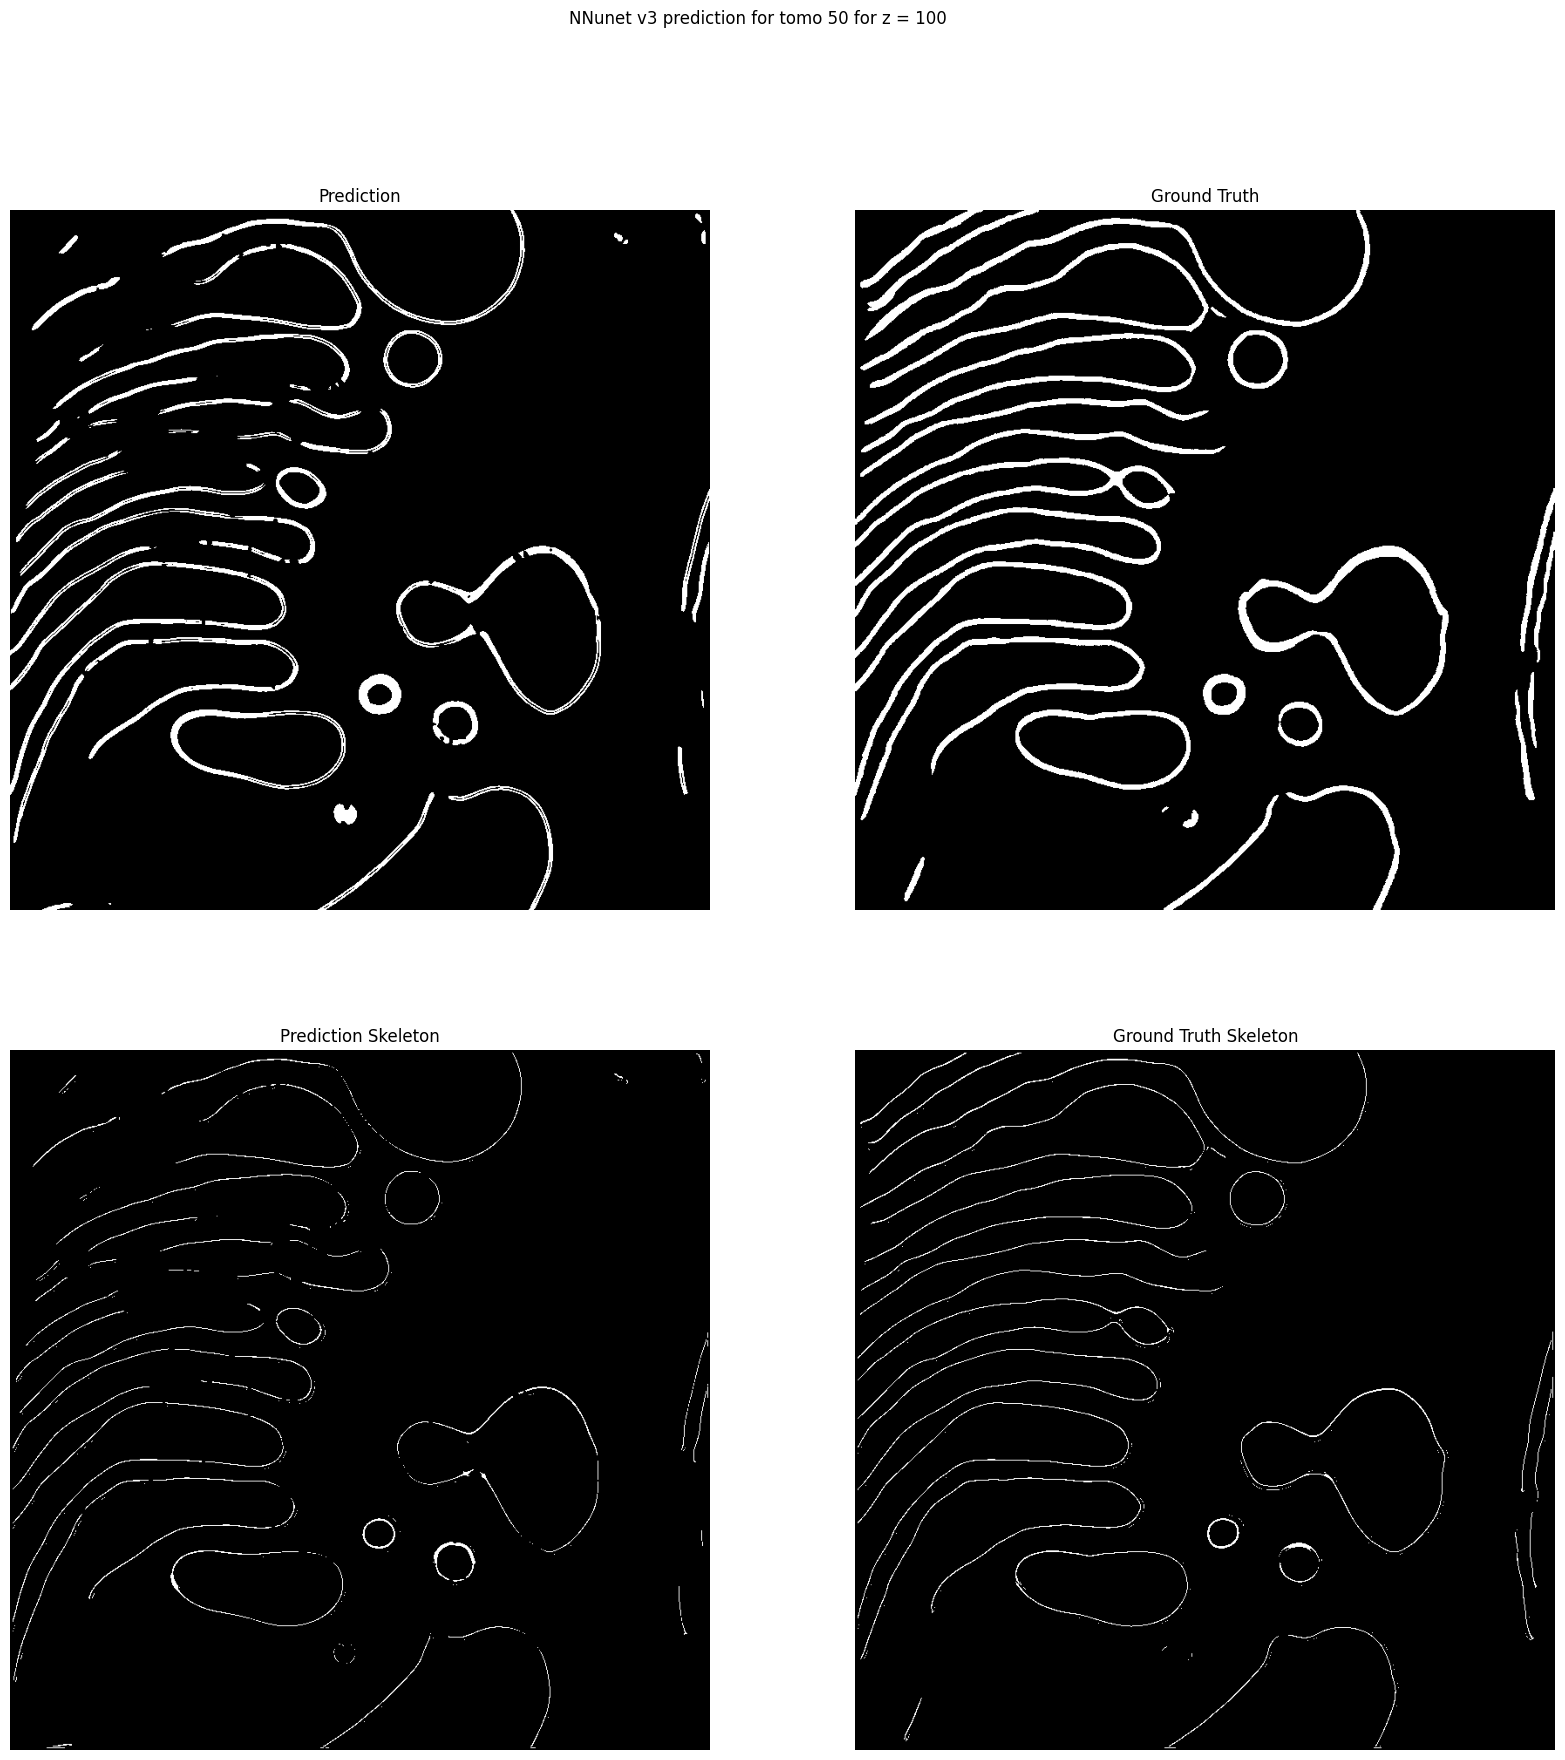

In [36]:
z = 100

visualize(
    pred=nn_unet_v3_pred == 1,
    gt=gt,
    pred_skeleton=nn_unet_v3_skeleton,
    gt_skeleton=gt_skeleton,
    z=z,
    name=f"NNunet v3 prediction for tomo {idx} for z = {z}",
)

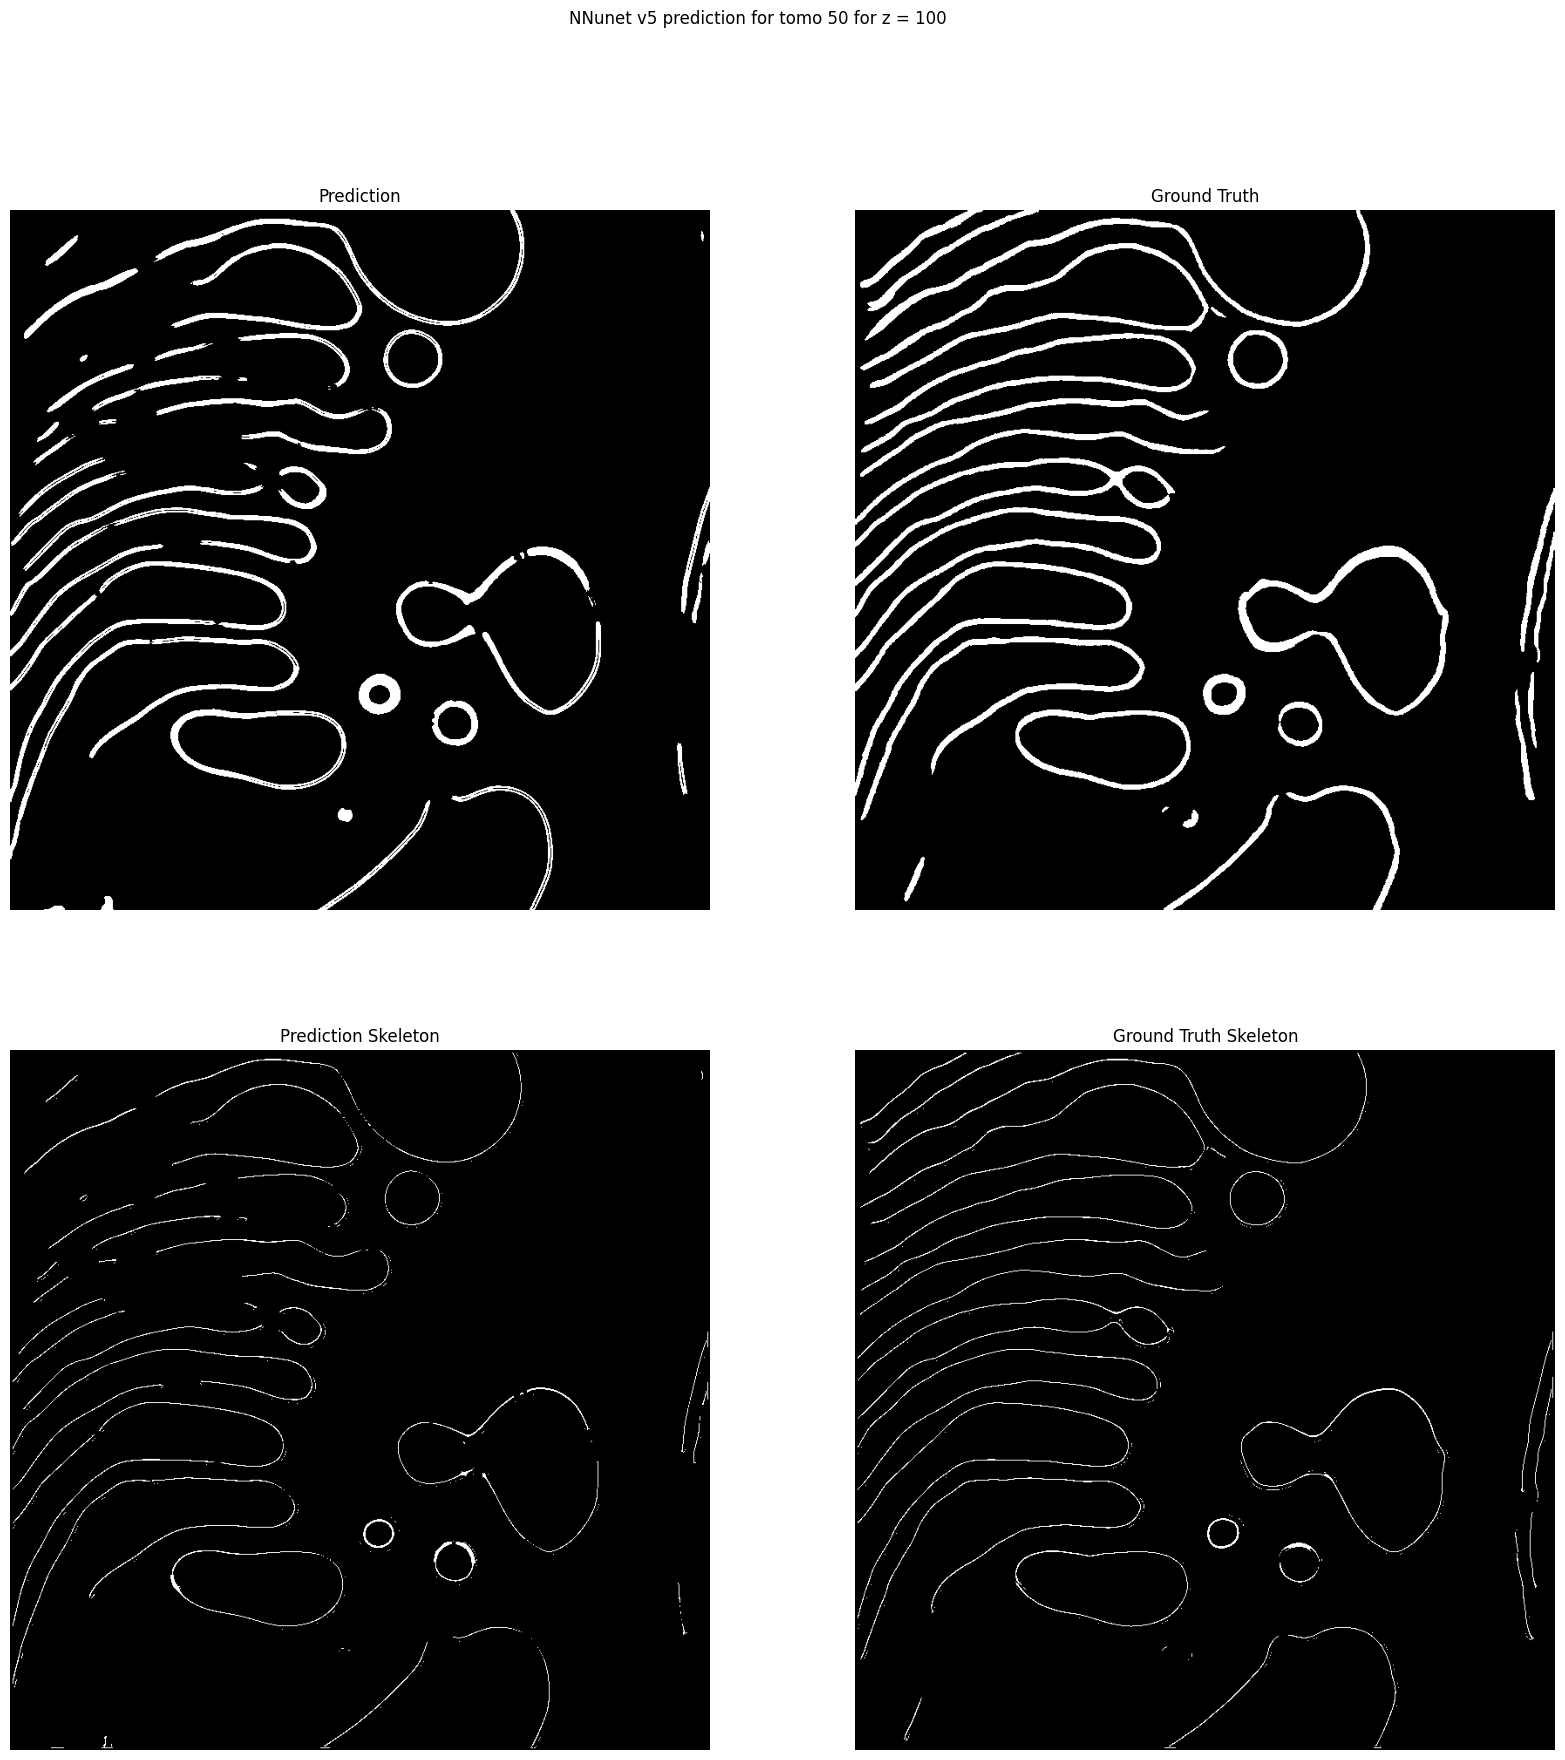

In [37]:
z = 100

visualize(
    pred=nn_unet_v5_pred == 1,
    gt=gt,
    pred_skeleton=nn_unet_v5_skeleton,
    gt_skeleton=gt_skeleton,
    z=z,
    name=f"NNunet v5 prediction for tomo {idx} for z = {z}",
)

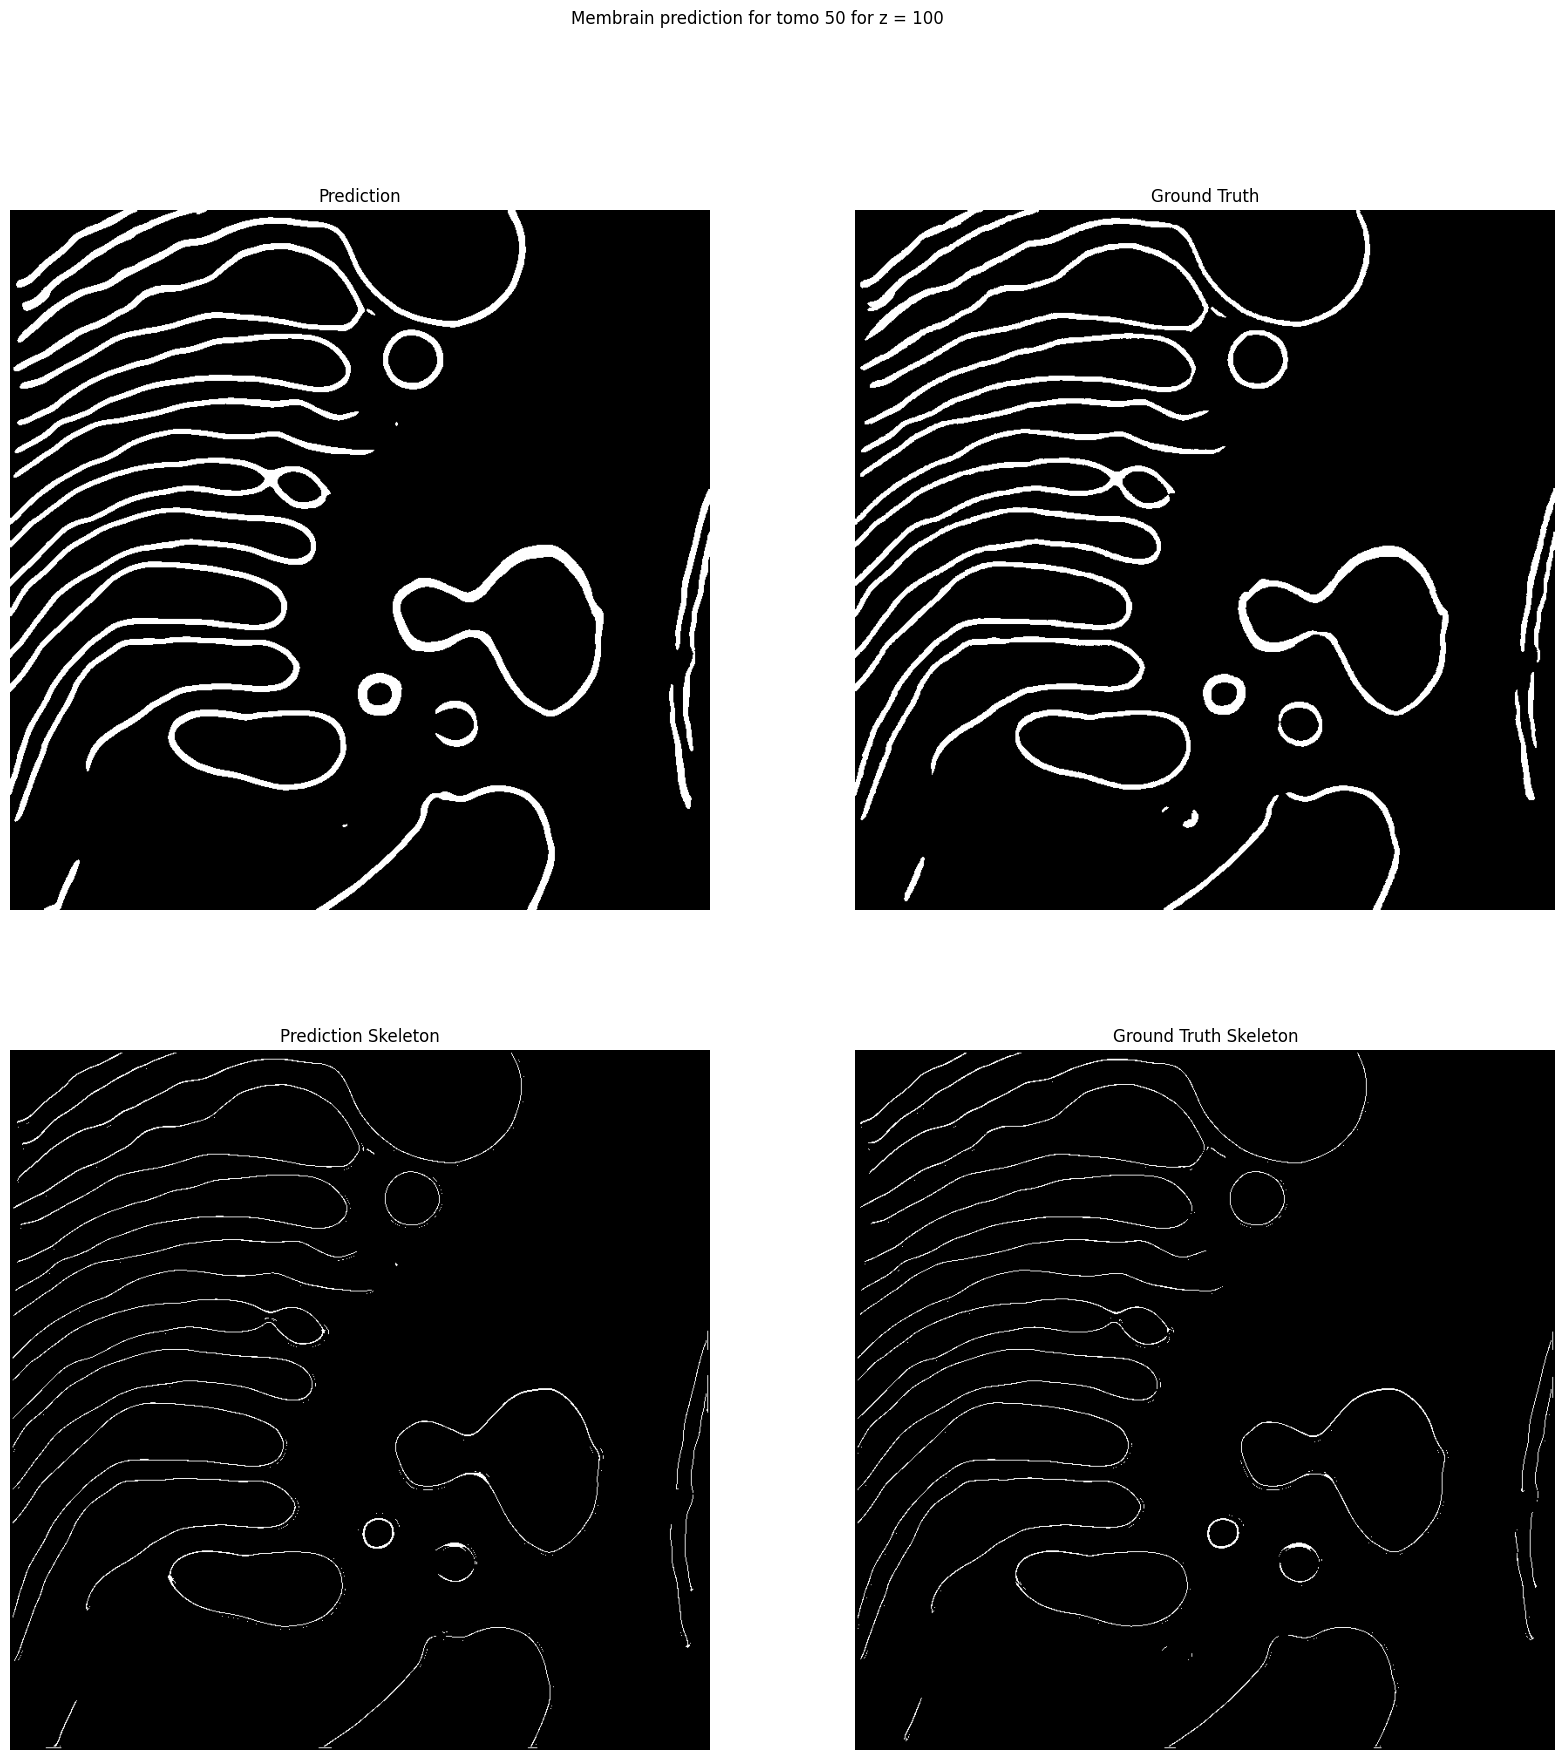

In [38]:
z = 100

visualize(
    pred=membrain_pred,
    gt=gt,
    pred_skeleton=membrain_skeleton,
    gt_skeleton=gt_skeleton,
    z=z,
    name=f"Membrain prediction for tomo {idx} for z = {z}",
)

In [39]:
df.columns

Index(['tomo_idx', 'gt_path', 'gt_skeleton_path',
       'dice_membrainseg_prediction', 'dice_nn_unet_v3', 'dice_nn_unet_v5',
       'pred_path_membrainseg_prediction', 'pred_path_nn_unet_v3',
       'pred_path_nn_unet_v5', 'pred_skeleton_path_membrainseg_prediction',
       'pred_skeleton_path_nn_unet_v3', 'pred_skeleton_path_nn_unet_v5',
       'tp_membrainseg_prediction', 'tp_nn_unet_v3', 'tp_nn_unet_v5',
       'ts_membrainseg_prediction', 'ts_nn_unet_v3', 'ts_nn_unet_v5'],
      dtype='object')

In [40]:
"dice" in "dice_nn_unet_v3"

True

In [41]:
df_visu = df.copy()
columns_to_keep = [
    col
    for col in df.columns
    if "tomo_idx" in col or "dice" in col or "ts" in col or "tp" in col
]
columns_to_drop = [col for col in df.columns if col not in columns_to_keep]
print(columns_to_keep)
df_visu.drop(
    columns=columns_to_drop,
    inplace=True,
)

['tomo_idx', 'dice_membrainseg_prediction', 'dice_nn_unet_v3', 'dice_nn_unet_v5', 'tp_membrainseg_prediction', 'tp_nn_unet_v3', 'tp_nn_unet_v5', 'ts_membrainseg_prediction', 'ts_nn_unet_v3', 'ts_nn_unet_v5']


In [42]:
df_visu.head()

,tomo_idx,dice_membrainseg_prediction,dice_nn_unet_v3,dice_nn_unet_v5,tp_membrainseg_prediction,tp_nn_unet_v3,tp_nn_unet_v5,ts_membrainseg_prediction,ts_nn_unet_v3,ts_nn_unet_v5
0,50,0.941294,0.704080,0.724915,0.903674,0.807870,0.780881,0.982182,0.623922,0.676435
1,167,0.918410,0.752076,0.751698,0.859217,0.796786,0.717859,0.986361,0.712117,0.788884
2,298,0.864776,0.791699,0.789317,0.796216,0.871328,0.857763,0.946256,0.725405,0.730988
3,649,0.918703,0.456682,0.385381,0.874011,0.332321,0.254878,0.968212,0.729779,0.789749
4,909,0.914518,0.303656,0.349663,0.848778,0.851160,0.870203,0.991296,0.184790,0.218788


In [43]:
df_visu.describe()

,tomo_idx,dice_membrainseg_prediction,dice_nn_unet_v3,dice_nn_unet_v5,tp_membrainseg_prediction,tp_nn_unet_v3,tp_nn_unet_v5,ts_membrainseg_prediction,ts_nn_unet_v3,ts_nn_unet_v5
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1372.000000,0.818986,0.514726,0.523762,0.746116,0.651184,0.636620,0.944023,0.496304,0.528400
std,1177.979155,0.173457,0.183205,0.180339,0.211802,0.236564,0.246596,0.059619,0.206189,0.213657
min,50.000000,0.401649,0.303656,0.323578,0.268899,0.284847,0.254878,0.793269,0.184790,0.218788
25%,385.750000,0.865041,0.364106,0.390679,0.793089,0.425662,0.428868,0.945357,0.326492,0.332276
50%,919.000000,0.875226,0.445210,0.437537,0.823821,0.757351,0.756522,0.962197,0.517712,0.534120
75%,2642.750000,0.917437,0.680604,0.701542,0.867961,0.818016,0.777273,0.980088,0.690068,0.717350
max,2917.000000,0.941294,0.791699,0.789317,0.903674,0.871328,0.870203,0.991296,0.729779,0.789749


In [44]:
df_visu

,tomo_idx,dice_membrainseg_prediction,dice_nn_unet_v3,dice_nn_unet_v5,tp_membrainseg_prediction,tp_nn_unet_v3,tp_nn_unet_v5,ts_membrainseg_prediction,ts_nn_unet_v3,ts_nn_unet_v5
0,50,0.941294,0.704080,0.724915,0.903674,0.807870,0.780881,0.982182,0.623922,0.676435
1,167,0.918410,0.752076,0.751698,0.859217,0.796786,0.717859,0.986361,0.712117,0.788884
2,298,0.864776,0.791699,0.789317,0.796216,0.871328,0.857763,0.946256,0.725405,0.730988
3,649,0.918703,0.456682,0.385381,0.874011,0.332321,0.254878,0.968212,0.729779,0.789749
4,909,0.914518,0.303656,0.349663,0.848778,0.851160,0.870203,0.991296,0.184790,0.218788
5,929,0.884042,0.350689,0.433264,0.870875,0.690989,0.763040,0.897612,0.234970,0.302519
6,2162,0.865833,0.610178,0.631424,0.798865,0.717917,0.750005,0.945057,0.530556,0.545220
7,2803,0.401649,0.340104,0.323578,0.268899,0.284847,0.272586,0.793269,0.421960,0.398038
8,2836,0.614223,0.404356,0.406574,0.448581,0.337220,0.332537,0.973806,0.504869,0.523020
9,2917,0.866409,0.433739,0.441810,0.792047,0.821397,0.766451,0.956182,0.294669,0.310355


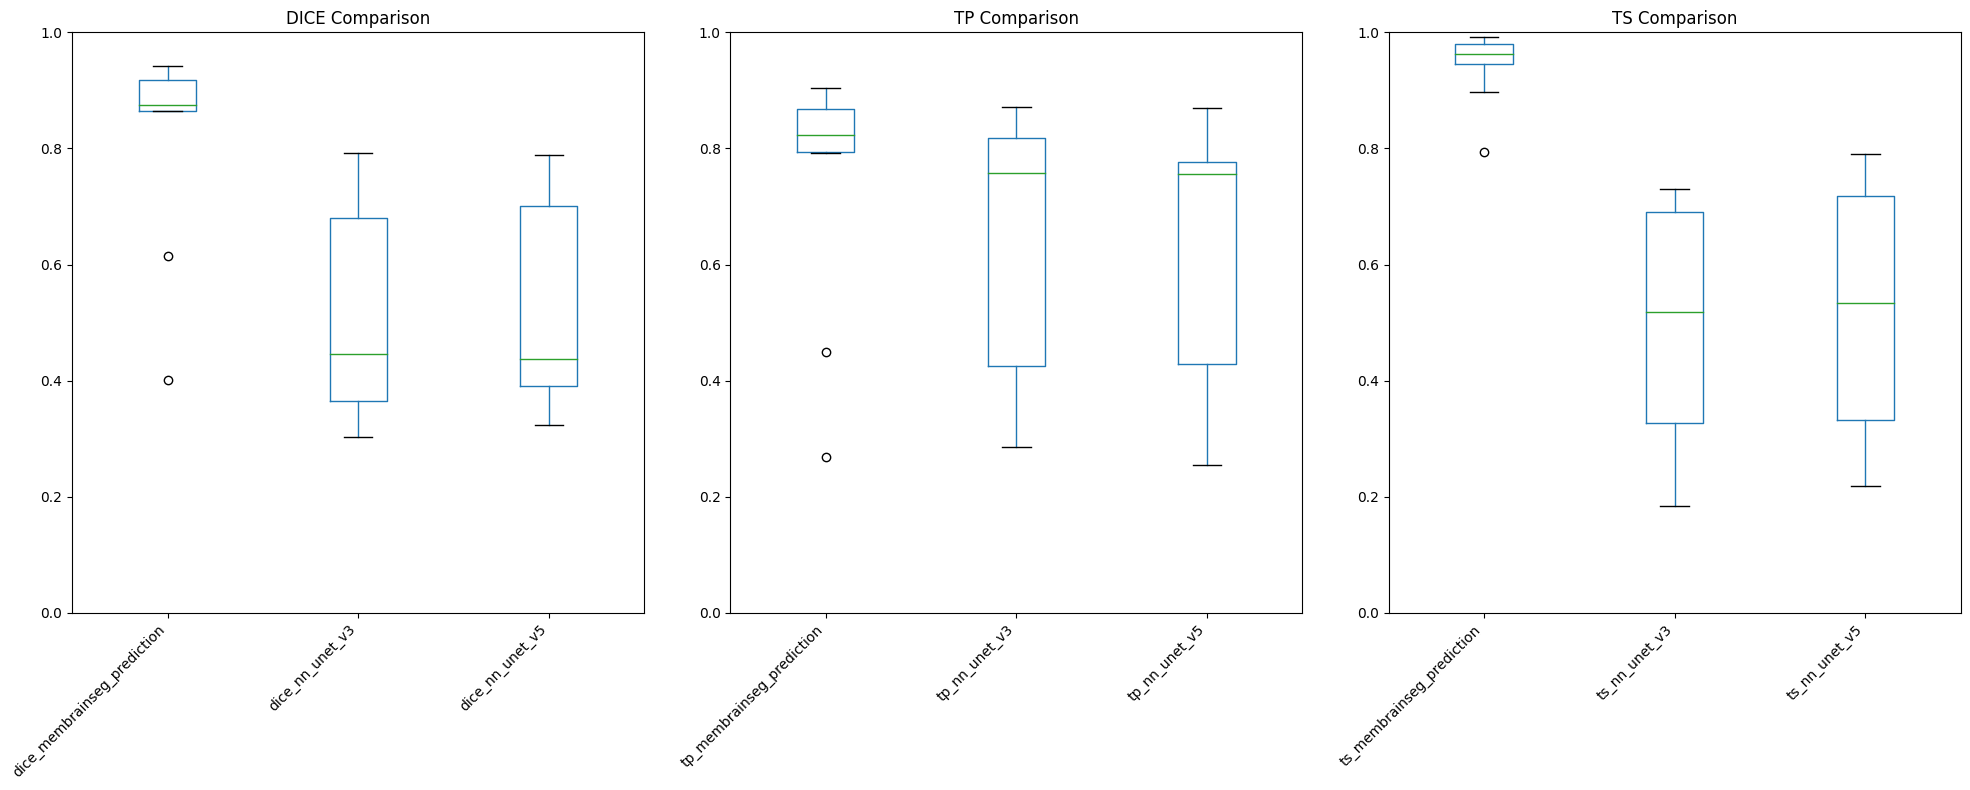

In [46]:
metrics = ["dice", "tp", "ts"]

fig, axes = plt.subplots(1, len(metrics), figsize=(20, 8))

for ax, metric in zip(axes, metrics):
    columns = [col for col in df_visu.columns if metric in col]
    df_visu.boxplot(ax=ax, column=columns, grid=False)
    ax.set_title(f"{metric.upper()} Comparison")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()